# Images and Image Plotting

<section class="objectives panel panel-warning">
<div class="panel-heading">
<h3><span class="fa fa-certificate"></span> Learning Objectives </h3>
</div>
<ul>
    <li>Read a FITS file</li>
    <li>Load and display an image</li>
    <li>Use array slicing operations to display part of a cube</li>
    <li>Use SunPy to explore a multi-dimensional array</li>
</ul>
</section>

## Arrays as images

All photographic images represent a measurement of how much light hits the receiver. For instance, the Hubble image below is obtained by measuring the brightnesses of distant stars:

![Hubble image](fig/galaxy.jpg)

With traditional optical cameras, this measurement results in an image which is continuous, as it is projected directly onto paper. In order to store images digitally, they need to be divided into discrete chunks, pixels, each of which contains the value of the measurement in that small portion of the image. In this representation, an image is simply a grid of numbers, which allows it to be easily stored as an array with a shape equal to the resolution of the image.

The `scikit-image` (abbreviated to `skimage` in code) module contains some sample images in the `data` submodule that we can use to demonstrate this principle.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from astropy.io import fits

In [3]:
from astropy.utils.data import download_file
cube_file = download_file("http://data.sunpy.org/CRISP_TXY_Cube.fits.gz", cache=True)

Read an array from a FITS file. For this lesson we will not be considering any coordinate information in the header. We will be covering that tomorrow.

In [5]:
cube = fits.getdata(cube_file)

This file is a time, solar-x, solar-y cube. To start off with we will be using the first image.

In [6]:
cube.shape

(50, 966, 980)

In [10]:
sunspot = cube[0, :, :]
sunspot.shape

(966, 980)

Once read in as an array, the image can be processed in the same ways as any other array. For instance, we can easily find the highest, lowest and mean values of the image, the type of the variables stored in the array, and the resolution of the image:

In [12]:
# Output the image minimum, mean and maximum.
print(sunspot.min(), sunspot.max(), sunspot.mean())
# Output the array dtype.
print(sunspot.dtype)
# Output image size.
print(sunspot.shape)

0.0 8677.0 1875.73
>f4
(966, 980)


## Plotting images

While storing an image as a grid of numbers is very useful for analysis, we still need to be able to visually inspect the image. This can be achieved with `plt.imshow()`, which allocates a colour to every element in the array according to its value.

<IPython.core.display.Javascript object>


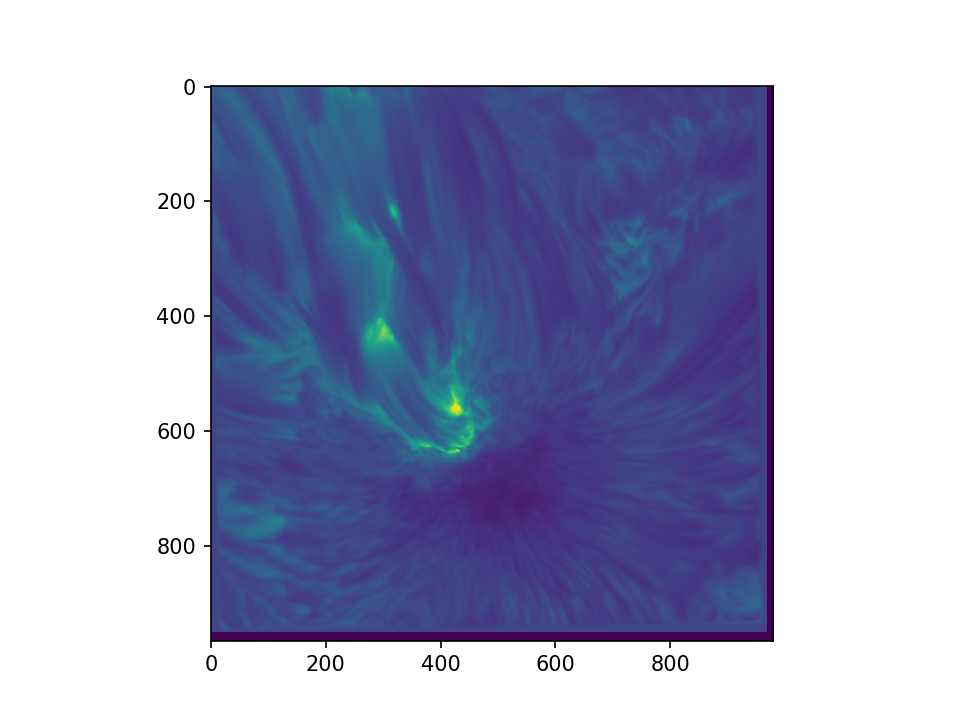

In [13]:
# Display image array with imshow()
plt.imshow(sunspot)

When plotting an image in this way, you will often need to know what actual values correspond to the colours. To find this out, we can draw a colour bar alongside the image which indicates the mapping of values to colours:

<IPython.core.display.Javascript object>


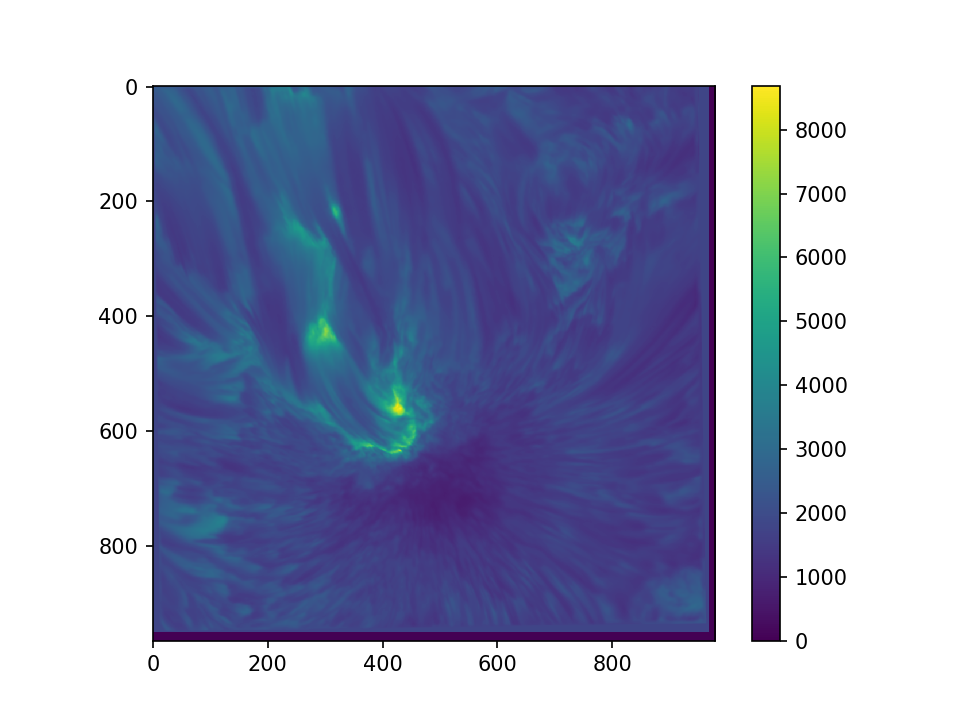

In [14]:
plt.imshow(sunspot)
plt.colorbar()

You may notice that the default mapping of values to colours doesn't show the features of this image very well. Fortunately, matplotlib provides a large variety of colour maps which are suitable for various different purposes (more on this later). `plt.imshow()` has a `cmap` keyword argument which can be passed a string defining the desired colour map.

<IPython.core.display.Javascript object>


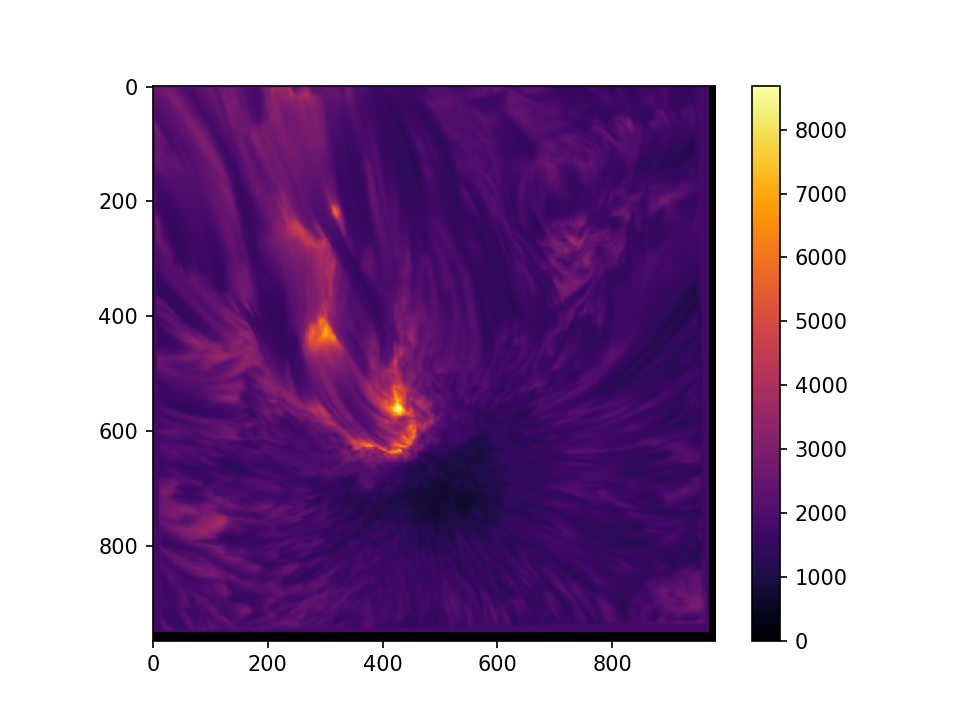

In [20]:
# Display the image with a more monochrome colour map.
plt.imshow(sunspot, cmap='inferno')
plt.colorbar()

The full list of available colour maps (for matplotlib 1.5) can be found [here](http://matplotlib.org/examples/color/colormaps_reference.html).

<section class="callout panel panel-info">
<div class="panel-heading">
<h3><span class="fa fa-certificate"></span> Colour maps </h3>
</div>

As the images above demonstrate, the choice of colour map can make a significant difference to how your image appears, and is therefore extremely important. This is partly due to discrepancies between how quickly the colour map changes and how quickly the data changes, and partly due to the fact that [different people see colour differently](https://en.wikipedia.org/wiki/The_dress_%28viral_phenomenon%29).<br/><br/>

In particular, matplotlib (1.x) default `'jet'` colour map is notoriously bad for displaying data. This is because it is not designed taking into account how the human eye percieves colour. This leads to some parts of the colour map appearing to change very slowly, while other parts of the colour map shift from one hue to another in a very short space. The practical effect of this is to both smooth some parts of the image, obscuring the data, and to create artificial features in the image where the data is smooth.<br/><br/>

There is no single 'best' colour map - different colour maps display different kinds of image most clearly - but the `jet` map is almost never an appropriate choice for displaying any data. In general, colour maps which vary luminosity uniformly (such as the `'gray'` colour map above or the `'cubehelix'` colour map) tend to be better. Plots of various colour maps' luminosities can be found [here](http://matplotlib.org/users/colormaps.html).<br/><br/>

For a good background on this topic and a description of a decent all-round colour map scheme, see [this paper](http://www.kennethmoreland.com/color-maps/ColorMapsExpanded.pdf).

</section>

<section class="challenges panel panel-success">
<div class="panel-heading">
<h3><span class="fa fa-pencil"></span> Load and plot an image </h3>
</div>

<ol>
    <li> Plot a Time-Space slice of the array (try plotting the ~720th row of the data across the sunspot)</li>
    <li> Change the colour map and add a colour bar. Also add axis labels.</li>
</ol>
</section>

<IPython.core.display.Javascript object>


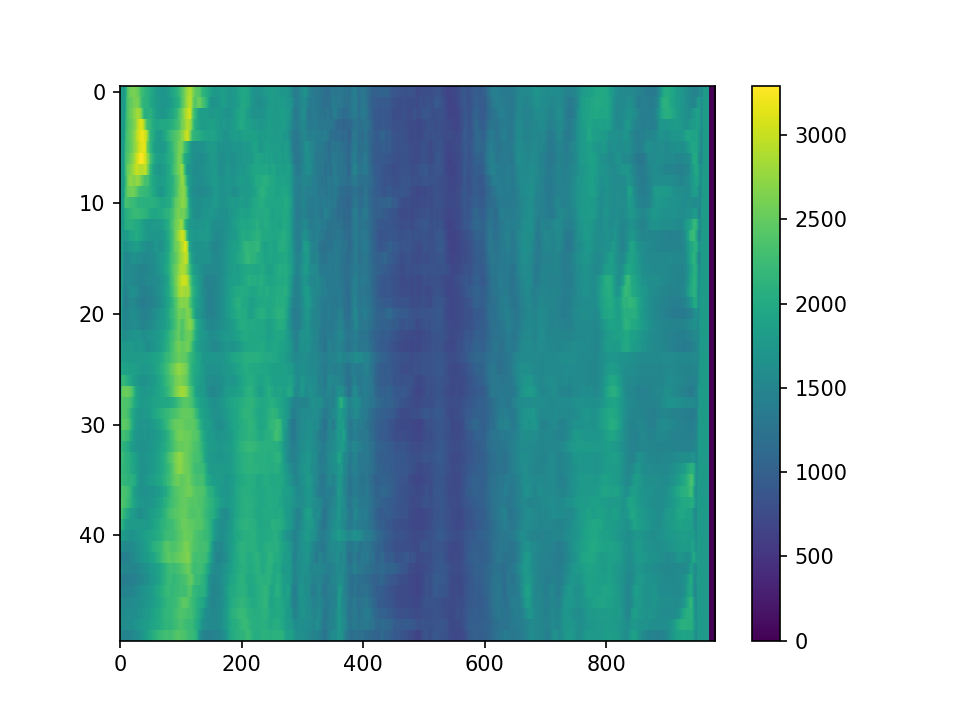

In [27]:
# 1
time_spot = cube[:, 719, :]
plt.figure()
plt.imshow(time_spot, aspect='auto')
plt.colorbar()

In [ ]:
# 2
# Display my image


### Value limits

The default behaviour of `imshow()` in terms of colour mapping is that the colours cover the full range of the data so that the lower end (blue, in the plots above) represents the smallest value in the array, and the higher end (red) represents the greatest value.

This is fine if rest of the values are fairly evenly spaced between these extremes. However, if we have a very low minimum or very high maximum compared to the rest of the image, this default scaling is unhelpful. To deal with this problem, `imshow()` allows you to set the minimum and maximum values used for the scaling with the `vmin` and `vmax` keywords.

In [ ]:
plt.figure()
plt.imshow(sunspot, vmin=100, vmax=4000)
plt.colorbar()

As you can see, this allows us to increase the contrast of the image at the cost of discounting extreme values, or we can include a broader range of values but see less detail. Similar effects can also be achieved with the `norm` keyword, which allows you to set how `imshow()` scales values in order to map them to colours (linear or logarithmic scaling, for example).

### Axes

You will notice in the above plots that the axes are labelled with the pixel coordinates of the image. You will also notice that the origin of the axes is in the top left corner rather than the bottom left. This is a convention in image-drawing, but can be changed if necessary by setting the `origin` keyword to `'lower'` when calling `imshow()`:

<IPython.core.display.Javascript object>


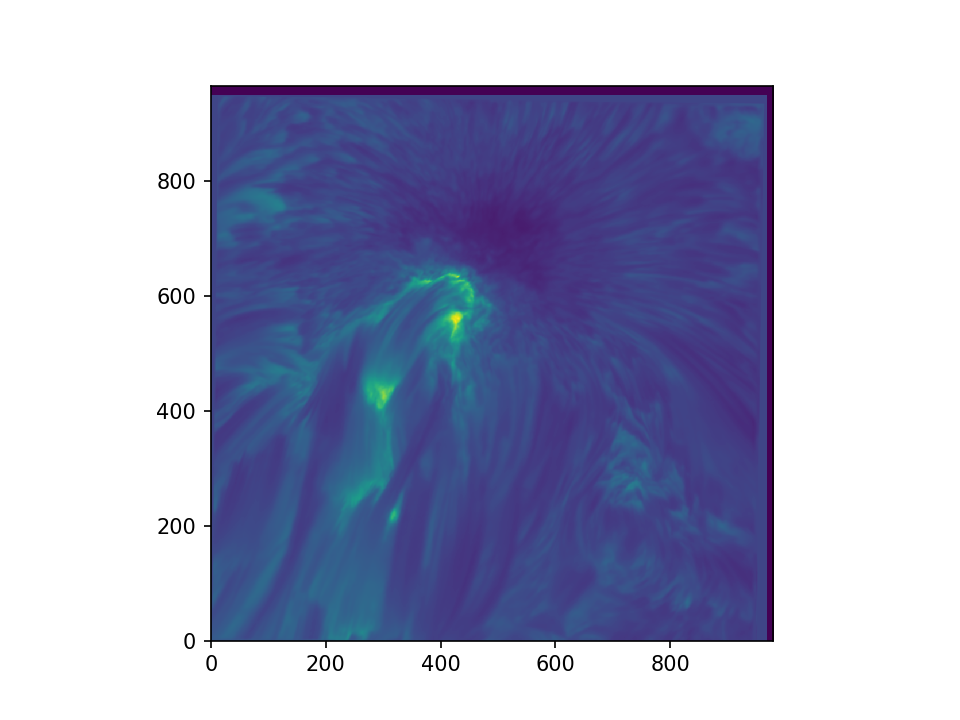

In [30]:
plt.figure()
plt.imshow(sunspot, origin="lower")

`imshow()` also allows you to change the upper and lower values of each axis, and the appropriate tick labels will be drawn. This feature can be used to apply physical spatial scales to the image (if you know them) rather than going purely on pixel positions, which may be less useful. This is done with the `extent` keyword, which takes a list of values corresponding to lower and upper x values and the lower and upper y values (in that order).

<IPython.core.display.Javascript object>


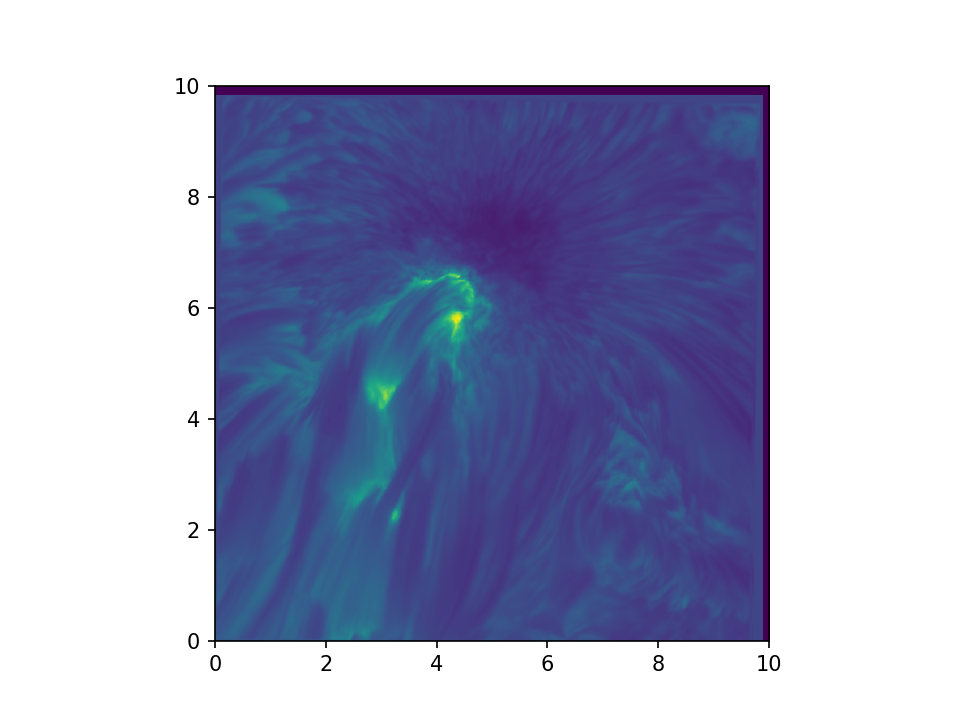

In [31]:
plt.figure()
plt.imshow(sunspot, origin="lower", extent=[0, 10, 0, 10])

<section class="objectives panel panel-success">
<div class="panel-heading">
<h3><span class="fa fa-pencil"></span> Value and axes limits </h3>
</div>

<ol>
    <li>Plot your chosen image again. Try changing the upper and lower limits of the plotted values to adjust how the image appears.</li>
</ol>
</section>

In [ ]:
# 1 
# Display the coins image with adjusted value range


## Interpolation

In order to display a smooth image, `imshow()` automatically interpolates to find what values should be displayed between the given data points. The default interpolation scheme is `'linear'`, which interpolates linearly between points, as you might expect. The interpolation can be changed with yet another keyword in `imshow()`. Here are a few examples:

<IPython.core.display.Javascript object>


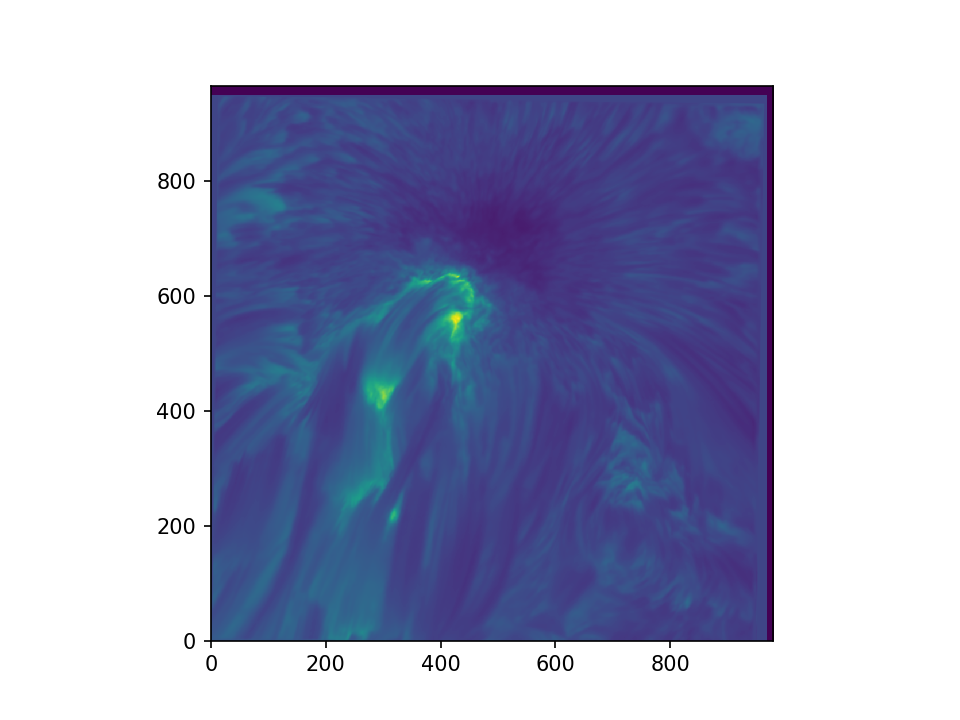

In [33]:
plt.figure()
plt.imshow(sunspot, origin="lower", interpolation="nearest")

This can be a useful way to change how the image appears. For instance, if the exact values of the data are extremely important, little or no interpolation may be appropriate so the original values are easier to discern, whereas a high level of interpolation can be used if the smoothness of the image is more important than the actual numbers.

Note that that `'none'` in the `imshow()` call above is NOT the same as `None`. `None` tells `imshow()` you are not passing it a variable for the `interpolation` keyword, so it uses the default, whereas `'none'` explicitly tells it not to interpolate.

## SunPy Cube Explorer

SunPy has an `ImageAnimator` class that will create sliders for each axis not used for plotting the image. By default it uses the last two axes of the array to plot the image.

In [34]:
from sunpy.visualization.imageanimator import ImageAnimator

<IPython.core.display.Javascript object>


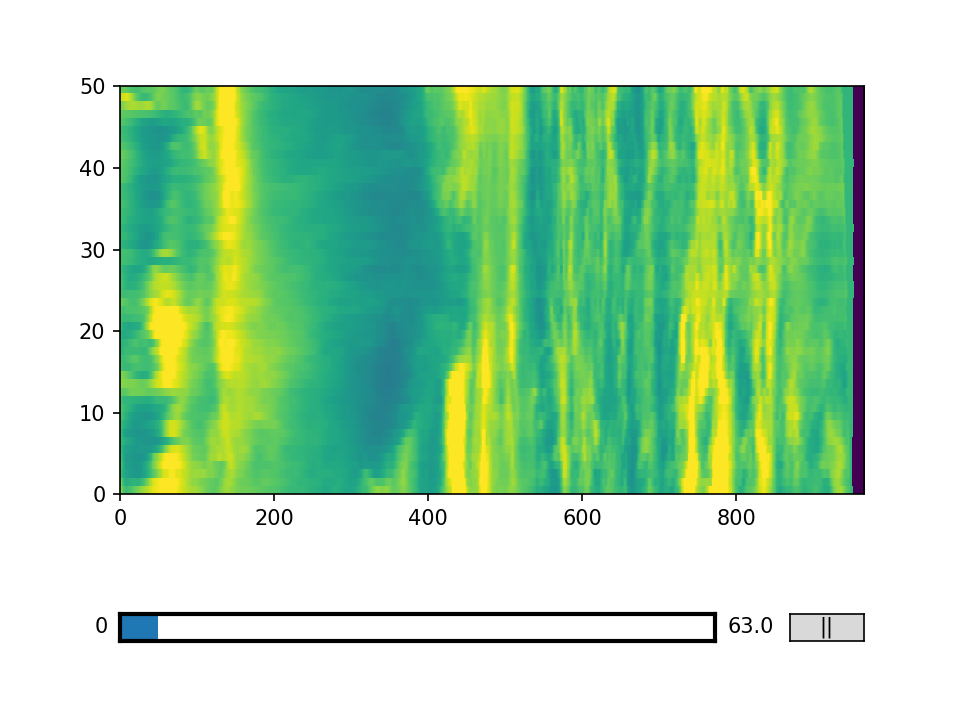

In [37]:
ImageAnimator(cube, image_axes=[0,1], aspect='auto')